# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv")

### Step 3. Assign it to a variable apple

In [3]:
apple=df
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 4.  Check out the type of the columns

In [4]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [5]:
apple['Date'] = pd.to_datetime(apple['Date'])

In [6]:
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

### Step 6.  Set the date as the index

In [7]:
apple.set_index(['Date'],inplace=True)

In [8]:
apple

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39


### Step 7.  Is there any duplicate dates?

In [10]:
dupl=apple.drop_duplicates('Date',keep='last')

KeyError: Index(['Date'], dtype='object')

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [9]:
print (apple.index.min())
print (apple.index.max())

1980-12-12 00:00:00
2014-07-08 00:00:00


In [13]:
apple.sort_values(['Date'], ascending = True)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


### Step 9. Get the last business day of each month

In [22]:
df['BMonthEnd'] = (df.index + pd.offsets.BMonthEnd(1)).day
df.tail(10)

,Open,High,Low,Close,Volume,Adj Close,Date,BMonthEnd
Date,,,,,,,,
1980-12-26,35.50,35.62,35.50,35.50,13893600,0.55,False,31
1980-12-24,32.50,32.63,32.50,32.50,12000800,0.51,False,31
1980-12-23,30.88,31.00,30.88,30.88,11737600,0.48,False,31
1980-12-22,29.63,29.75,29.63,29.63,9340800,0.46,False,31
1980-12-19,28.25,28.38,28.25,28.25,12157600,0.44,False,31
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41,False,31
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40,False,31
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39,False,31
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42,False,31


In [24]:
df.groupby('Date')

ValueError: 'Date' is both an index level and a column label, which is ambiguous.

### Step 10.  What is the difference in days between the first day and the oldest

In [26]:
a = (apple.index[0] - apple.index[-1]).days
a

12261

### Step 11.  How many months in the data we have?

In [30]:
s=df.groupby([df.Dates.dt.year.rename('year'), df.Dates.dt.month.rename('month')]).size()

AttributeError: 'DataFrame' object has no attribute 'Dates'

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

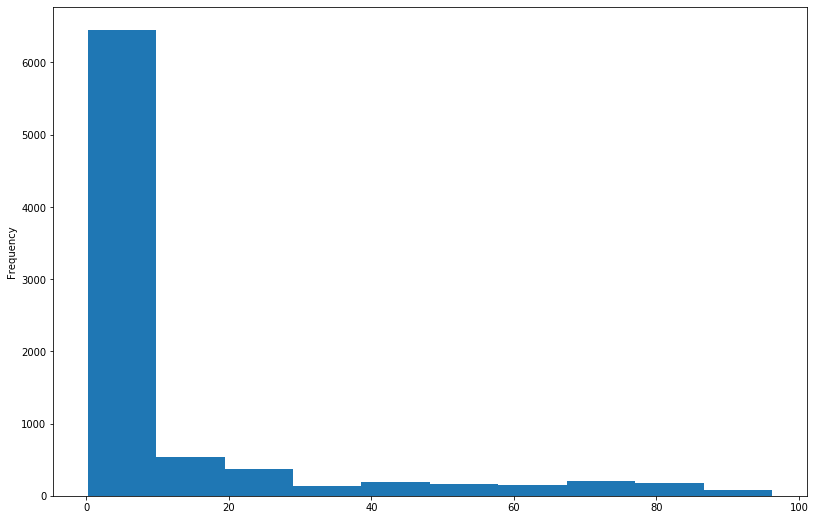

In [32]:
apple['Adj Close'].plot(kind='hist',  figsize=(13.5, 9))

### BONUS: Create your own question and answer it.

In [31]:
apple

,Open,High,Low,Close,Volume,Adj Close,Date,BMonthEnd
Date,,,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35,False,31
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97,False,31
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03,False,31
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48,False,31
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52,False,31
...,...,...,...,...,...,...,...,...
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41,False,31
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40,False,31
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39,False,31
